- Exploring Features of the dataset
- Hypothesis Testing
- Checking for Normal Distribution using Transformations

### Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## import the csv data as pandas dataframe

In [2]:
df = pd.read_csv('C:/Users/suhas/EDA_FULL_CASE_STUDY/Student_performance_stastical_analysis/cleaned.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 2.Hypothesis testing
### 2.1 checking correlation

In [4]:
df[['math score','reading score','writing score','total_score','average']].corr(method='pearson')

,math score,reading score,writing score,total_score,average
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000


In [5]:
num_data = ['math score','reading score','writing score','total_score','average']

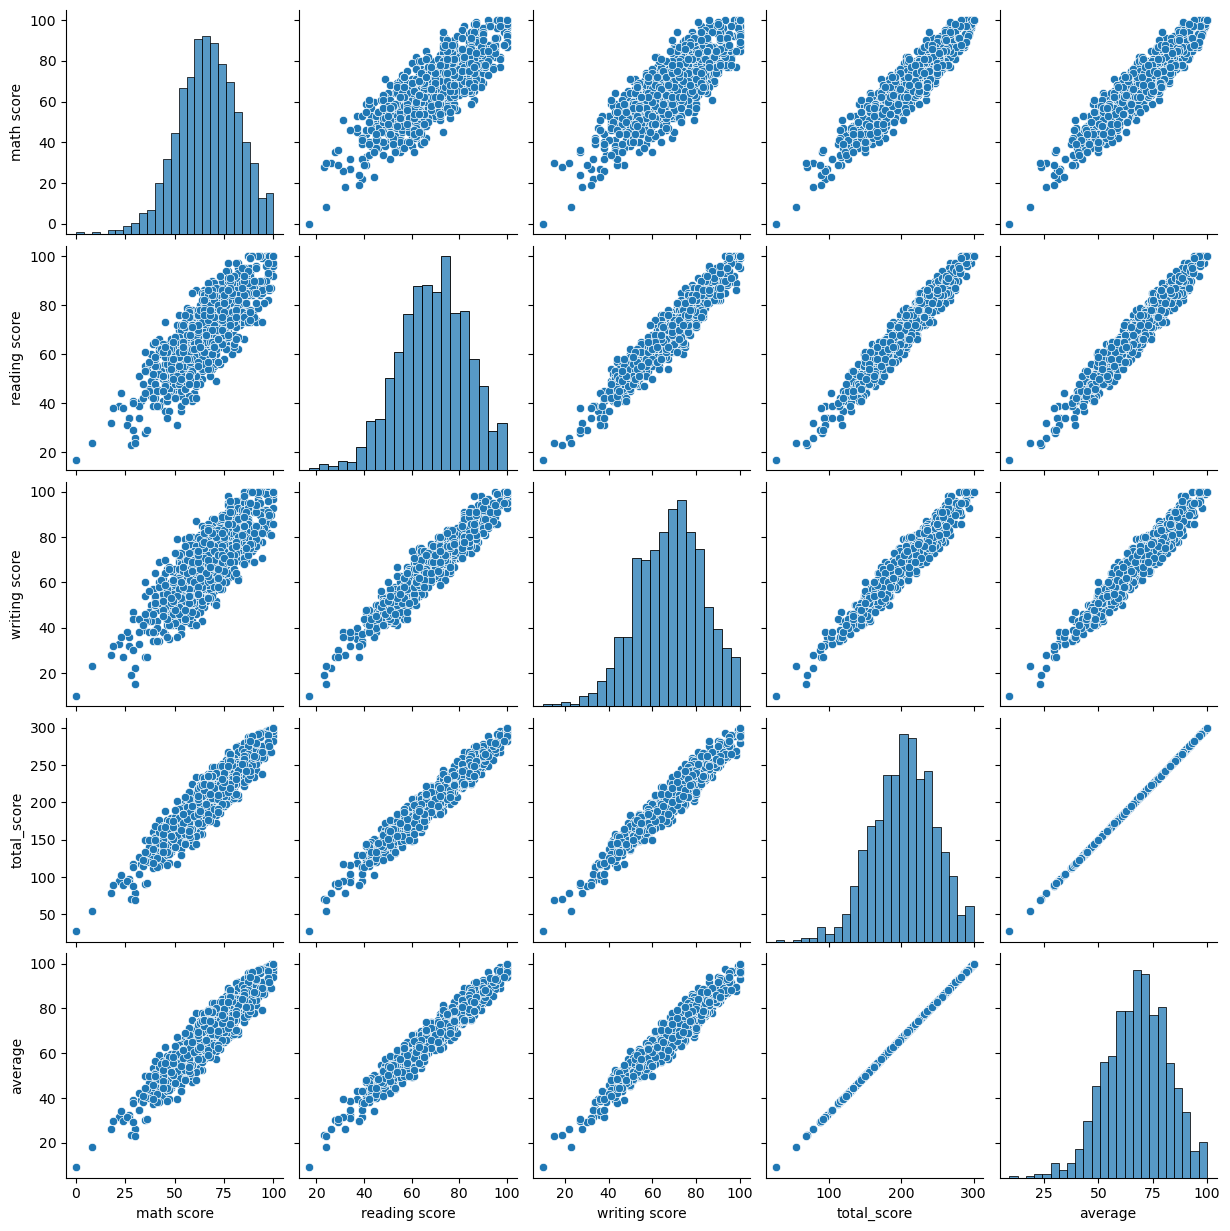

In [6]:
sns.pairplot(df[num_data])

### insights
- All of teh pariplot seems to have a linear relationship with the other variable >to clarify what we will plot the corrleation map

In [7]:
num_features = [features for features in df.columns if df[features].dtypes!='O']

In [8]:
num_features

['math score', 'reading score', 'writing score', 'total_score', 'average']

In [9]:
num_df = df[num_features]
num_df.head()

,math score,reading score,writing score,total_score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


## 2.2 Shapiro wick test
- Shapiro wick test is a way to tell if a random sample comes from a normal distribution.
- H0 : Data is normally distributed
- H1 : Data is not normally distributed

In [22]:
from scipy.stats import shapiro
shapiro_wick_test = []

for column in num_features:
    dataTotest = num_df[column]
    stat,p = shapiro(dataTotest)
    
    if p >0.05:
        shapiro_wick_test.append('Normally Distributed')
    else:
        shapiro_wick_test.append('Not normally distributed')
result = pd.DataFrame(data = [num_features,shapiro_wick_test]).T
result.column = ['Column name','Shapiro Hypothesis result']
result

,0,1
0,math score,Not normally distributed
1,reading score,Not normally distributed
2,writing score,Not normally distributed
3,total_score,Not normally distributed
4,average,Not normally distributed


In [23]:
shapiro(dataTotest)

ShapiroResult(statistic=0.9931509494781494, pvalue=0.0001453693985240534)

## 2.3 k^2 Normality test
- Tets aims to establish whether or not the given sample comes from a normally distributed populaton.Test is based on transformation of the sample kurtosis and skewness
- H0 : Data is normally distributed
- H1 : Data is not normally distributed

In [24]:
from scipy.stats import normaltest

normal_test  = []

for column in num_features:
    dataTotest = num_df[column]
    
    stat,p  = normaltest(dataTotest)
    
    if p > 0.05:
        normal_test.append('Normally Distributed')
        
    else:
        normal_test.append('Not normally Distributed')
result = pd.DataFrame(data= [num_features,normal_test]).T
result.columns = ['Column name', 'Normaltest Hypothesis Result']
result


,Column name,Normaltest Hypothesis Result
0,math score,Not normally Distributed
1,reading score,Not normally Distributed
2,writing score,Not normally Distributed
3,total_score,Not normally Distributed
4,average,Not normally Distributed


## 2.4 spearman test
- Spearman Rank correlation,which is used to measure the correlation between two ranked variables
- Whereas The Pearson correlation is competed using raw data values
- Unline the Pearson correlation ,the Spearman correlation does not assume that both datasets are normally distributed
- Spearman rank correlation is closely related to the Pearson correlation and both are a bounded value between -1 to 1 denoting a correlation between two variables

- H0 : independent sample
- H1 : Dependent variale

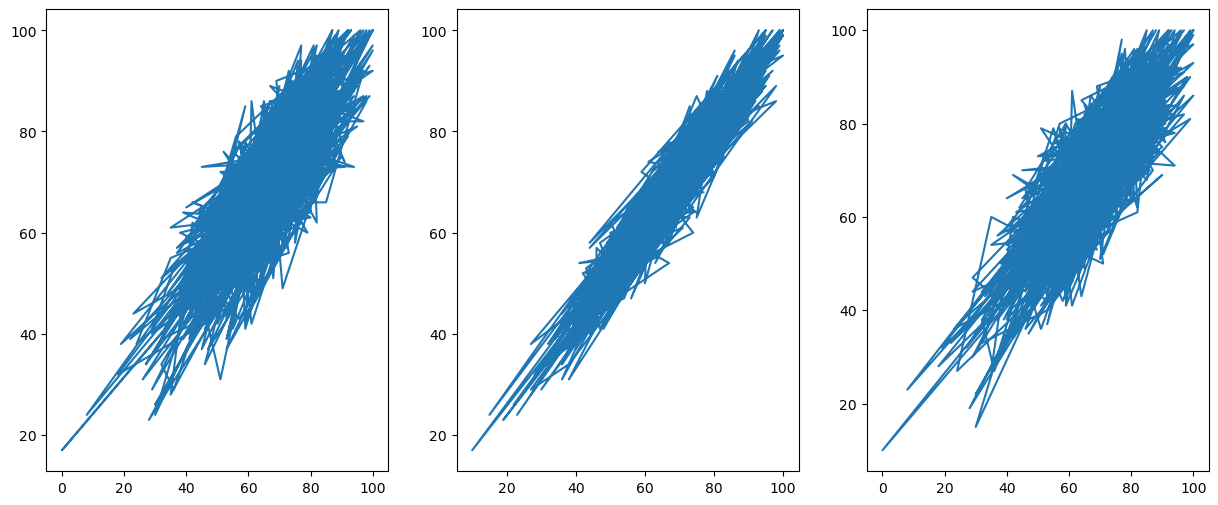

In [25]:
plt.rcParams['figure.figsize'] = (15,6)
plt.subplot(1,3,1)
plt.plot(num_df['math score'],num_df['reading score'])
plt.subplot(1,3,2)
plt.plot(num_df['writing score'],num_df['reading score'])
plt.subplot(1,3,3)
plt.plot(num_df['math score'],num_df['writing score'])
plt.show()

## Insights
- We can observe linear  relationship among two variable 
- lets prove it hypothetically too using Spearman Rank and pearson correlation tests

In [26]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1,column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test,column2_to_test)
    
    d = dict()
    d['col1'] = column1
    d['col2'] = column2
    d['col3'] = test_name
    
    if p > 0.05:
        test_result.append('Independent sample')
    else:
        test_result.append('Dependent sample')
    column_combination.append(d)

In [27]:
column_combination = []
test_result = []
test_correlation(spearmanr,'math score','reading score')
test_correlation(spearmanr,'writing score','reading score')
test_correlation(spearmanr,'math score','writing score' )

In [28]:
df_spearmanr = pd.DataFrame(column_combination,test_result)
df_spearmanr

,col1,col2,col3
Dependent sample,math score,reading score,<function spearmanr at 0x0000029910192E80>
Dependent sample,writing score,reading score,<function spearmanr at 0x0000029910192E80>
Dependent sample,math score,writing score,<function spearmanr at 0x0000029910192E80>


In [29]:
test_correlation(pearsonr,'math score','reading score')
test_correlation(pearsonr,'writing score','reading score')
test_correlation(pearsonr,'math score','writing score' )

In [30]:
df_pearsonr = pd.DataFrame(column_combination,test_result)
df_pearsonr

,col1,col2,col3
Dependent sample,math score,reading score,<function spearmanr at 0x0000029910192E80>
Dependent sample,writing score,reading score,<function spearmanr at 0x0000029910192E80>
Dependent sample,math score,writing score,<function spearmanr at 0x0000029910192E80>
Dependent sample,math score,reading score,<function pearsonr at 0x0000029910192B60>
Dependent sample,writing score,reading score,<function pearsonr at 0x0000029910192B60>
Dependent sample,math score,writing score,<function pearsonr at 0x0000029910192B60>


### Result
- At 5% level of significance 
- from above two tests pf pearsonr and spearmanr
- since all the three p-values are more than 0.05
- inference :The scores have a correlation between them

In [31]:
categorical_column = [features for features in df.columns if df[features].dtypes =='O' ]
categorical_column

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## Chi-square test
- testes whether two caegorical features are dependent or not
- Here we will test correlation of caterogical columns with target column i.e average
- Assumption: 1) All are Independent observation    2) size of each box of contingency table >25

In [32]:
from scipy.stats import chi2_contingency
chi2_test= []
for features in categorical_column:
    stat,p,dof,exceted = chi2_contingency(pd.crosstab(df['average'],df[features]))
    if p > 0.05:
        chi2_test.append('Independent Category')
    else:
        chi2_test.append('Dependent category')
result = pd.DataFrame(data = [categorical_column,chi2_test]).T
result.columns = ['column','Hypothesis result']
result

,column,Hypothesis result
0,gender,Independent Category
1,race/ethnicity,Independent Category
2,parental level of education,Independent Category
3,lunch,Dependent category
4,test preparation course,Dependent category


In [33]:
pd.crosstab(df['average'],df['lunch']).head()

lunch,free/reduced,standard
average,,
9.000000,1,0
18.333333,1,0
23.000000,1,0
23.333333,1,0
26.000000,1,1


### Levene's Test
- Equality of variance test
- H0 : Female and male have equale variance
- H1 : Female and male do not have equal variance

In [37]:
from scipy.stats import levene
math_var = levene(df[df['gender']=='female']['math score'],df[df['gender']=='male']['math score'],center='mean')
reading_var = levene(df[df['gender']=='female']['reading score'],df[df['gender']=='male']['reading score'],center='mean')
writing_var = levene(df[df['gender']=='female']['writing score'],df[df['gender']=='male']['writing score'],center='mean')

print("Test statistic and p-value for math is",math_var)
print('\n')
print("Test statistic and p-value for reading is",reading_var)
print('\n')
print("Test statistic and p-value for wrinting is",writing_var)

Test statistic and p-value for math is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


Test statistic and p-value for wrinting is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


In [38]:
math_var

LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)

In [39]:
writing_var

LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)

In [40]:
reading_var

LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)

### Result
- Conclusion : Since, at 5% level of significance, P(calculated) > P(0.05).
- Therefore we will accept the null hypothesis
- Inference : All the scores have equal variance with respect to gender.

### Checking Correlation using Heatmaps

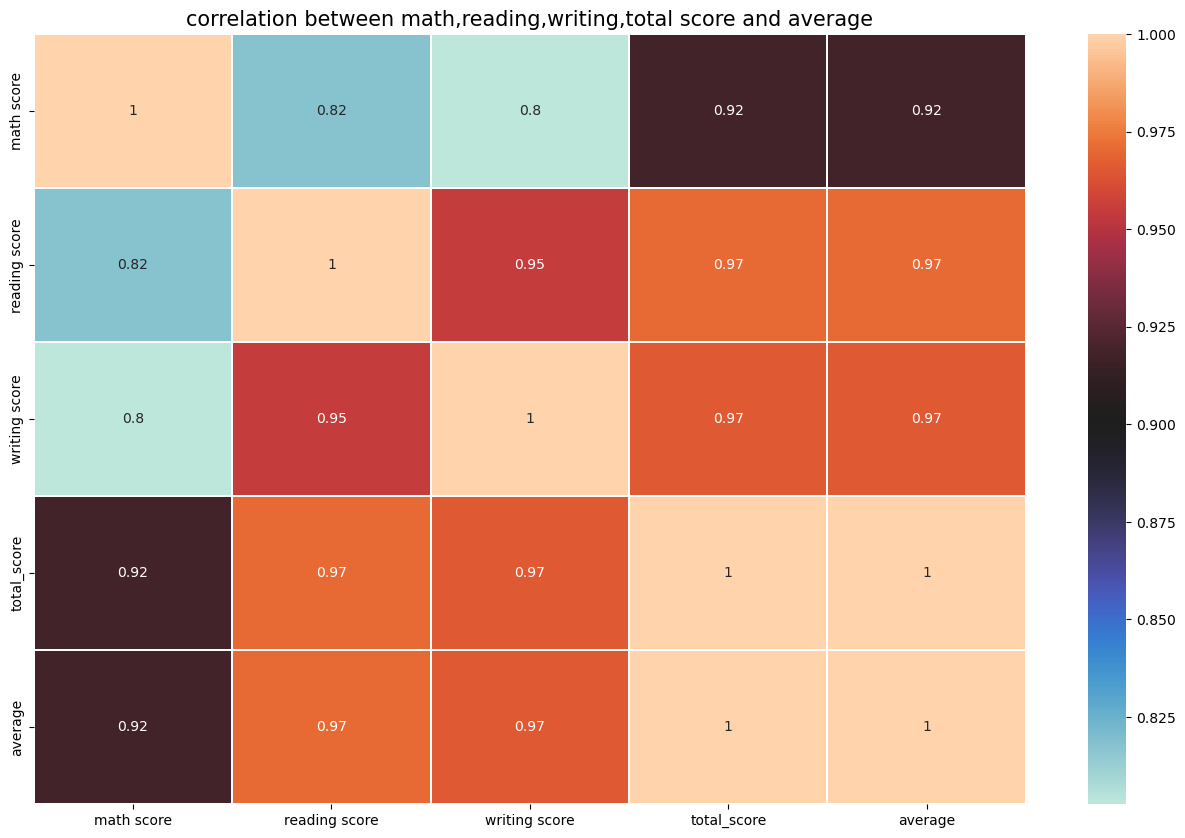

In [49]:
#Relationship analysis
corr = df[['math score','reading score','writing score','total_score','average']].corr()
sns.heatmap(corr,annot = True,cmap = 'icefire',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title('correlation between math,reading,writing,total score and average',color = 'black',size = 15)
plt.show()

### Insights
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.



### 3 . Checking for Normal Distribution using Transformations
- Q-Q plot (to check if data is normally distributed or not)

<Axes: xlabel='average', ylabel='Density'>

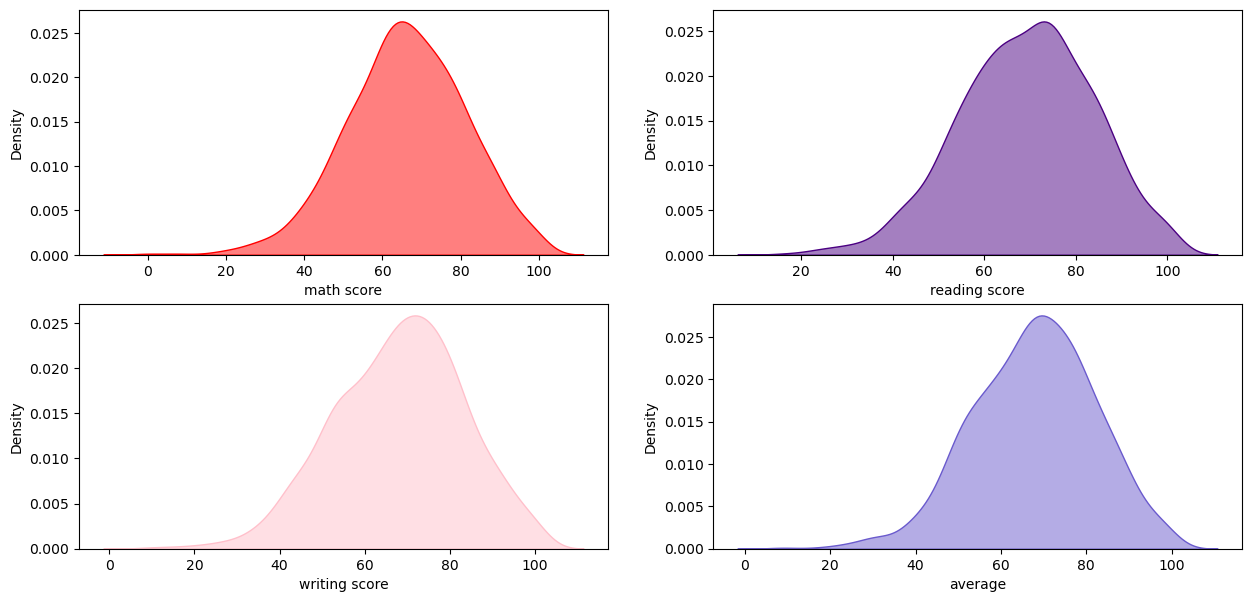

In [61]:
fig,axs = plt.subplots(2,2,figsize=(15,7))
sns.kdeplot(df['math score'],shade = True,label = 'Maths',color = 'Red',ax = axs[0,0],alpha=0.5)
sns.kdeplot(df['reading score'],shade = True,label = 'Reading',color = 'indigo',ax = axs[0,1],alpha=0.5)
sns.kdeplot(df['writing score'],shade = True,label = 'Writing',color = 'pink',ax = axs[1,0],alpha=0.5)
sns.kdeplot(df['average'],shade = True,label = 'Average',color = 'slateblue',ax = axs[1,1],alpha=0.5)

In [63]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('Before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    plt.show()

## Log Transform

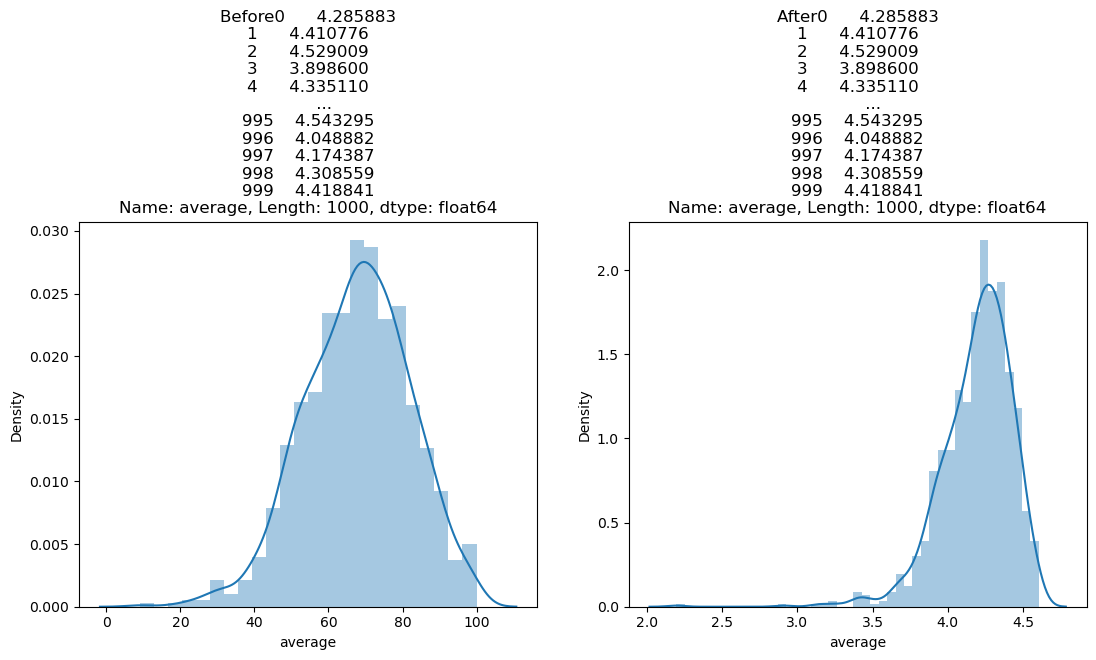

Skewness value -1.5373448376786043


In [66]:
plots(df,'average',np.log(df['average']))
print("Skewness value", np.log(df['average']).skew())

### Insights
- A negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.

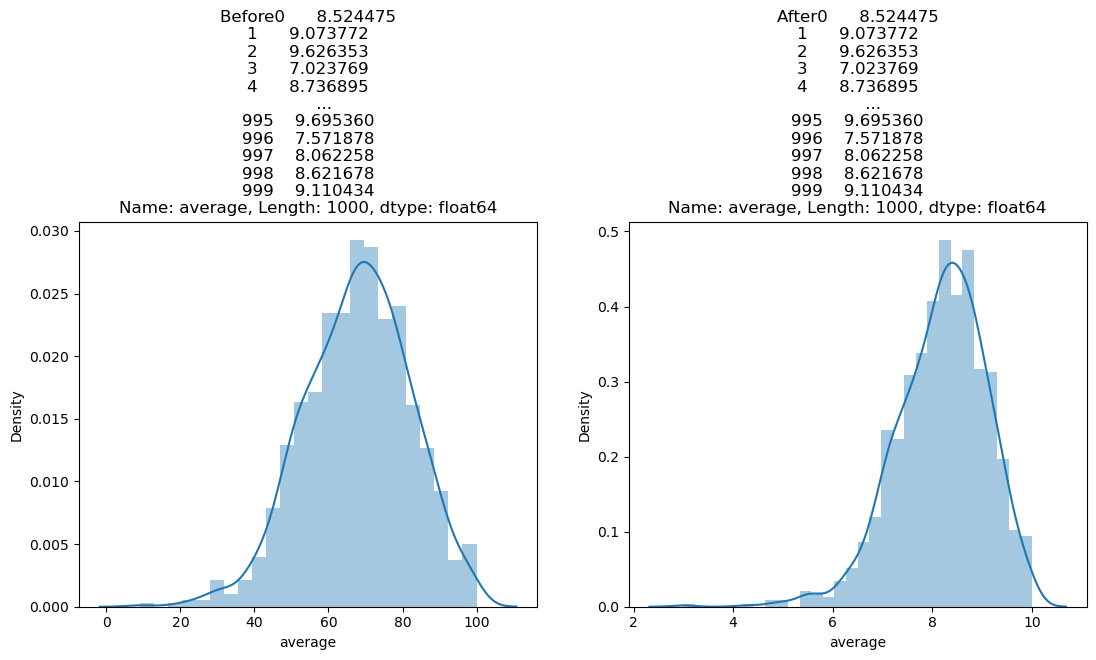

Skewness value -0.7534310044571916


In [68]:
plots(df,'average',np.sqrt(df['average']))
print('Skewness value',np.sqrt(df['average']).skew())

### ploting the distribution and qq plot

In [70]:
def plots_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title('{} PDF'.format(column))
    plt.subplot(122)
    stats.probplot(df[column],dist='norm',plot=plt)
    plt.title('{} QQ plot'.format(column))
    plt.show()

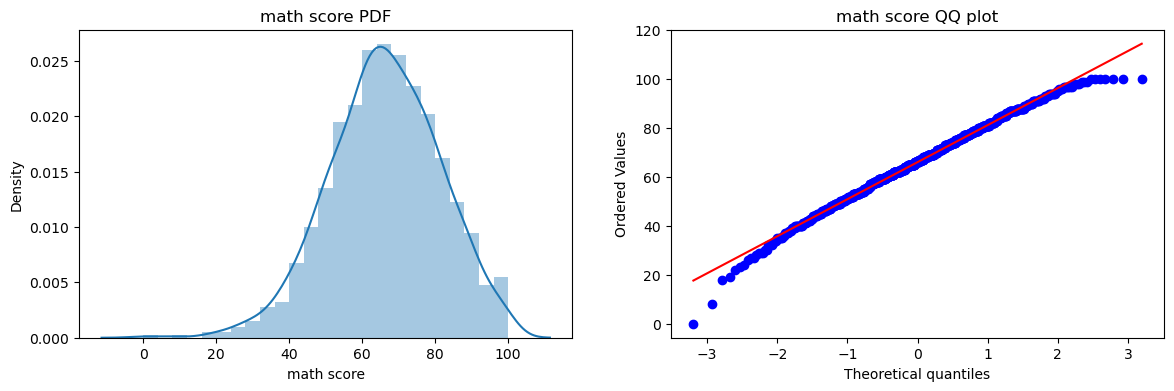

In [71]:
plots_qq_plot('math score')

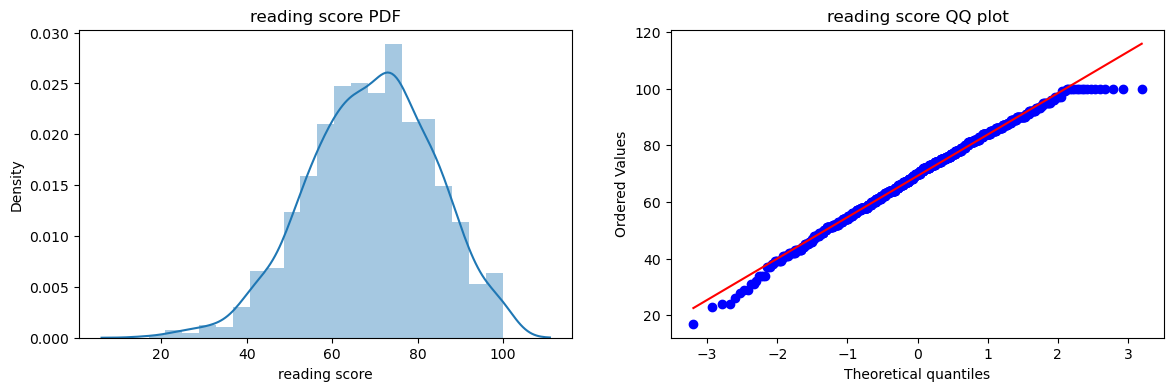

In [72]:
plots_qq_plot('reading score')

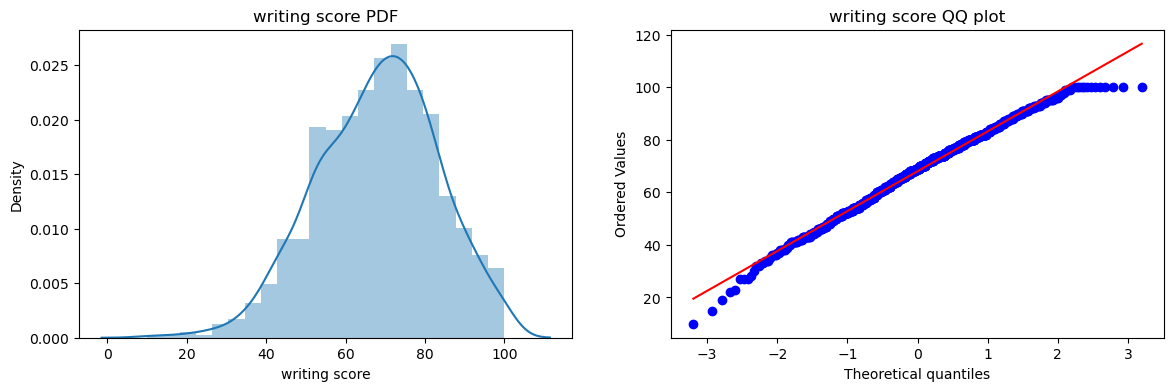

In [73]:
plots_qq_plot('writing score')

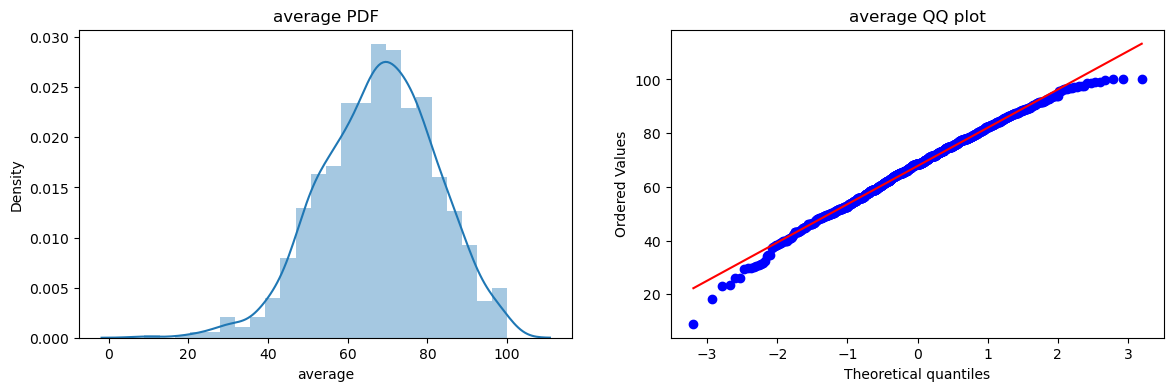

In [74]:
plots_qq_plot('average')

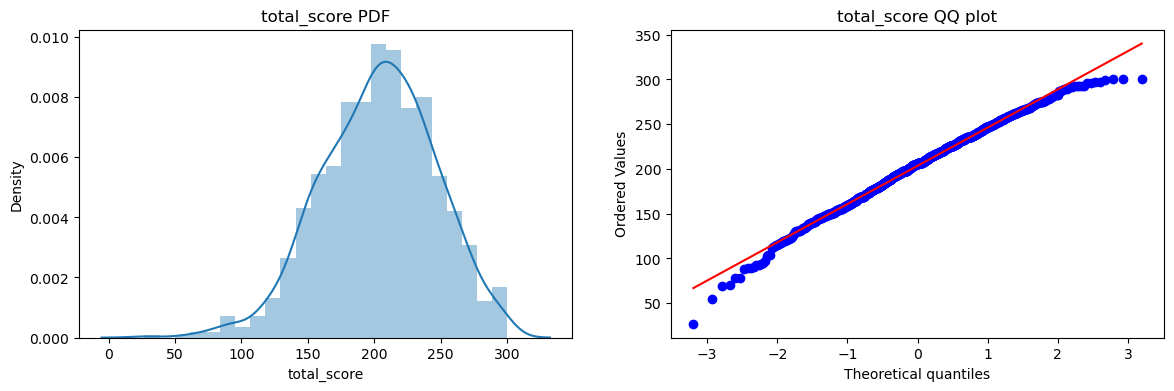

In [75]:
plots_qq_plot('total_score')

### Insights
- For range -2 to 2 avg_score & math score follows normal distribution, but for values less than -2 and for values greater than 2 and less than -2 it doesn't follow normal distribution

Text(0.5, 0.98, 'Normality check for students score using Q-Q chart')

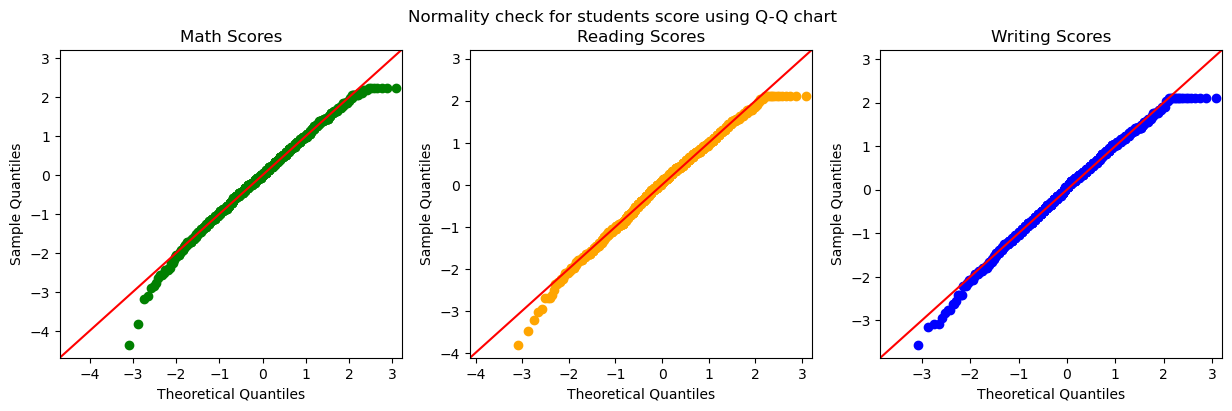

In [86]:
import statsmodels.api as sm # to build the qqplot
#fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(15,4))
fig,ax= plt.subplots(1,3,figsize=(15,4))
sm.qqplot(df['math score'],markerfacecolor='green',markeredgecolor = 'green',line = '45',fit = True,ax=ax[0])
ax[0].set_title("Math Scores")
sm.qqplot(df['writing score'],markerfacecolor = 'orange' , markeredgecolor = 'orange',line = '45',fit=True,ax=ax[1])
ax[1].set_title("Reading Scores")
sm.qqplot(df['reading score'],markeredgecolor = 'blue',markerfacecolor = 'blue',line = '45',fit=True,ax=ax[2])
ax[2].set_title("Writing Scores")
plt.suptitle('Normality check for students score using Q-Q chart')